In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_excel(path):
    return pd.read_excel(path)

In [3]:
path_1 = '../Data/Preprocessing/Data Losarang/2024/3_lhrt_losarang_2024.xlsx'

df = read_excel(path_1)
df.head()

,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,Friday,00:00,232,232,379,186,232,947,1364
1,Friday,01:00,254,246,386,204,246,965,1414
2,Friday,02:00,162,221,338,129,221,844,1194
3,Friday,03:00,108,210,337,86,210,840,1138
4,Friday,04:00,106,191,310,85,191,774,1051


In [4]:
def normalisasi(df, HARI):
    data = df[df['HARI'] == HARI].copy() 
    data.loc[:, 'SMP_zscore'] = (data['SMP'] - data['SMP'].min()) / (data['SMP'].max() - data['SMP'].min())
    return data
    

In [5]:
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [6]:
# List untuk menampung hasil normalisasi
df_list = []

# Iterasi untuk setiap hari dan normalisasi data
for day in day_names:
    df_normalized = normalisasi(df, day)
    df_list.append(df_normalized)

# Menggabungkan kembali hasilnya menjadi satu DataFrame
df_result = pd.concat(df_list)

In [7]:
df = df_result.copy()
df.to_excel('../Data/Preprocessing/Data Losarang/2024/4_lhrt_normalisasi_losarang_2024.xlsx', index=False)
df.head(48)

,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP,SMP_zscore
24,Monday,00:00,250,228,190,199,228,476,904,0.173855
25,Monday,01:00,168,225,198,135,225,495,854,0.140677
26,Monday,02:00,159,216,184,127,216,459,803,0.106835
27,Monday,03:00,118,195,174,95,195,435,724,0.054413
28,Monday,04:00,127,170,149,101,170,371,642,0.000000
29,Monday,05:00,229,174,161,183,174,404,762,0.079628
30,Monday,06:00,584,247,223,468,247,556,1270,0.416722
31,Monday,07:00,932,297,211,746,297,528,1572,0.617120
32,Monday,08:00,784,311,186,627,311,464,1402,0.504313
33,Monday,09:00,724,326,149,580,326,373,1278,0.422031


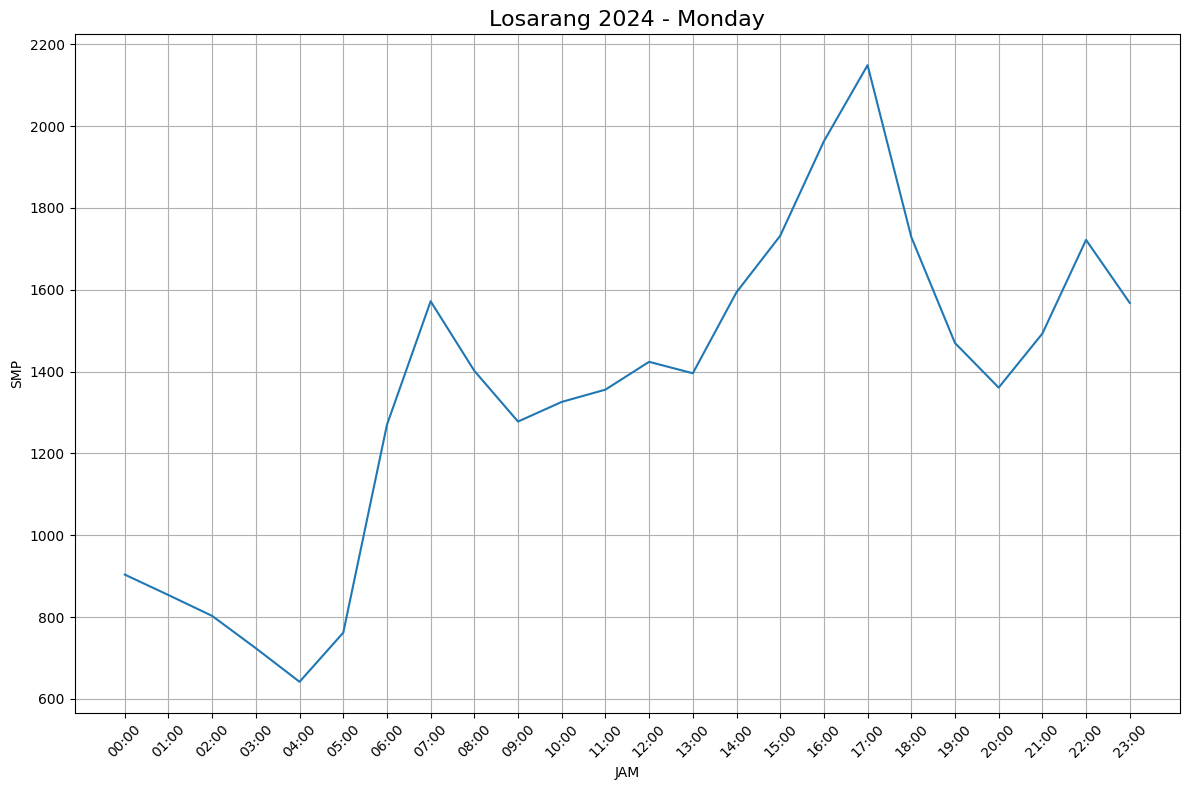

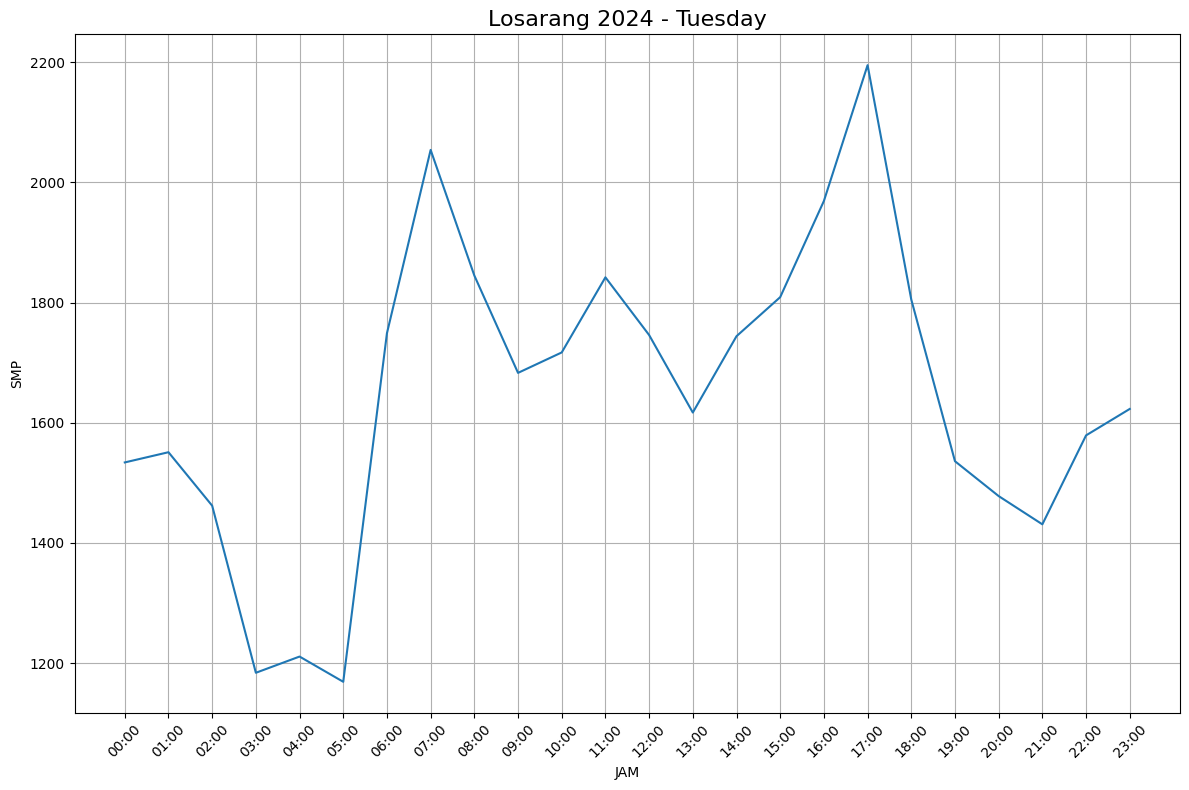

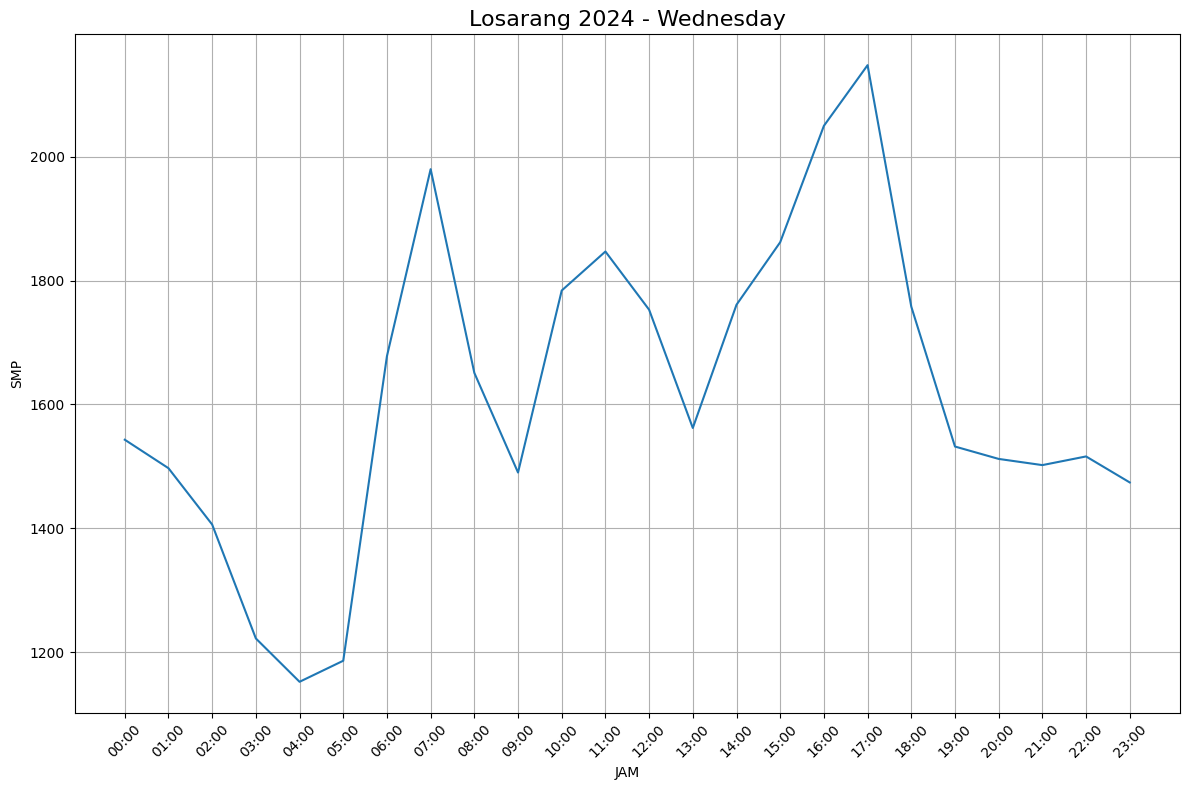

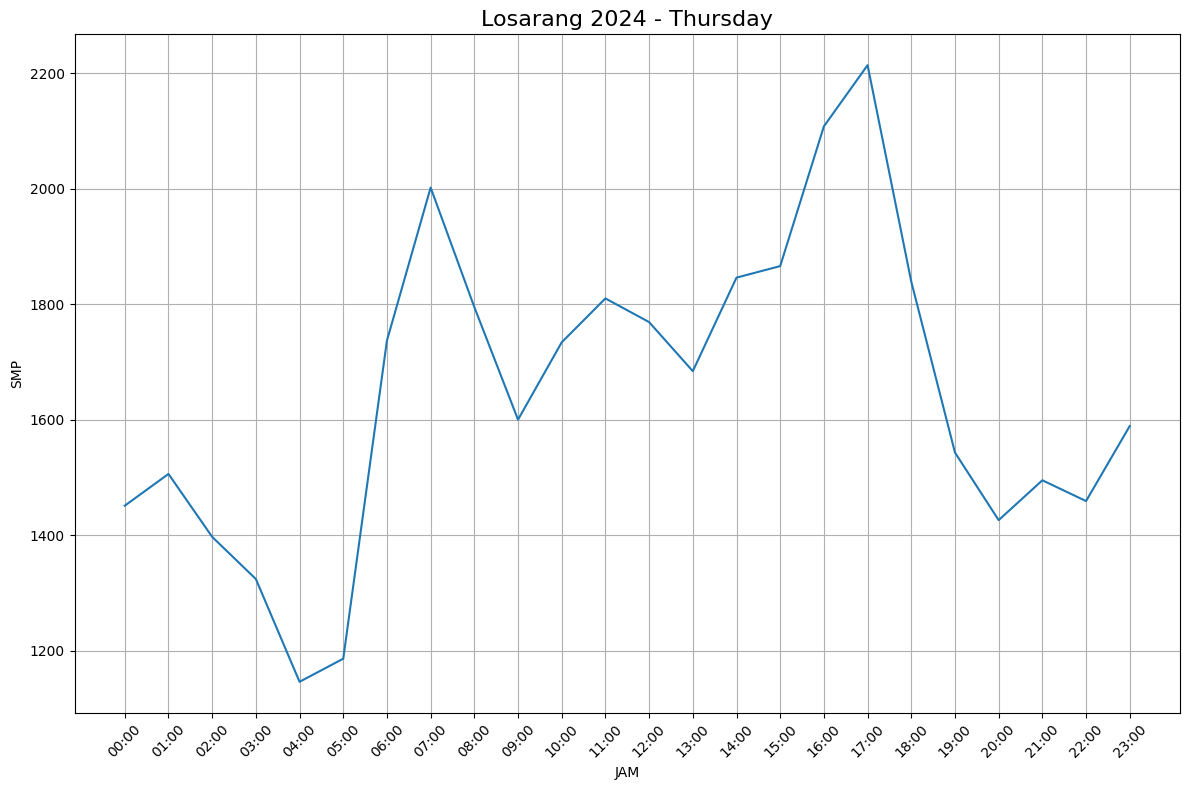

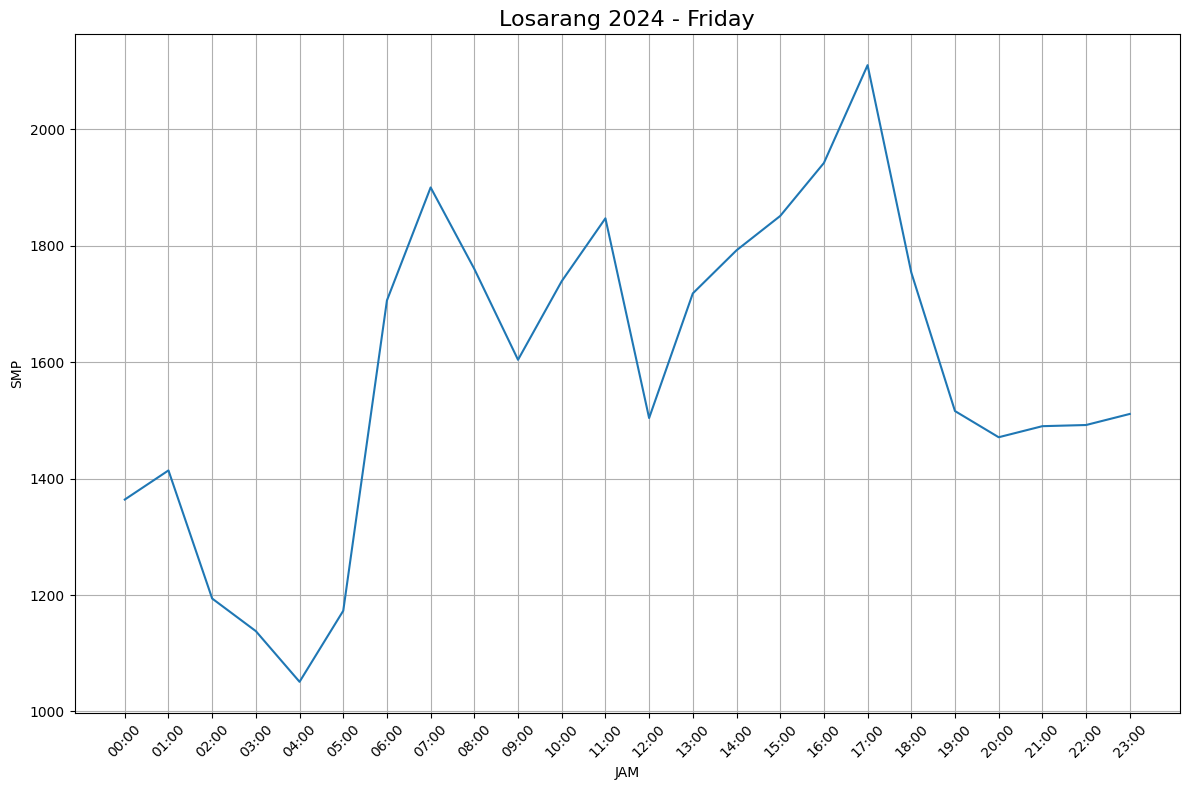

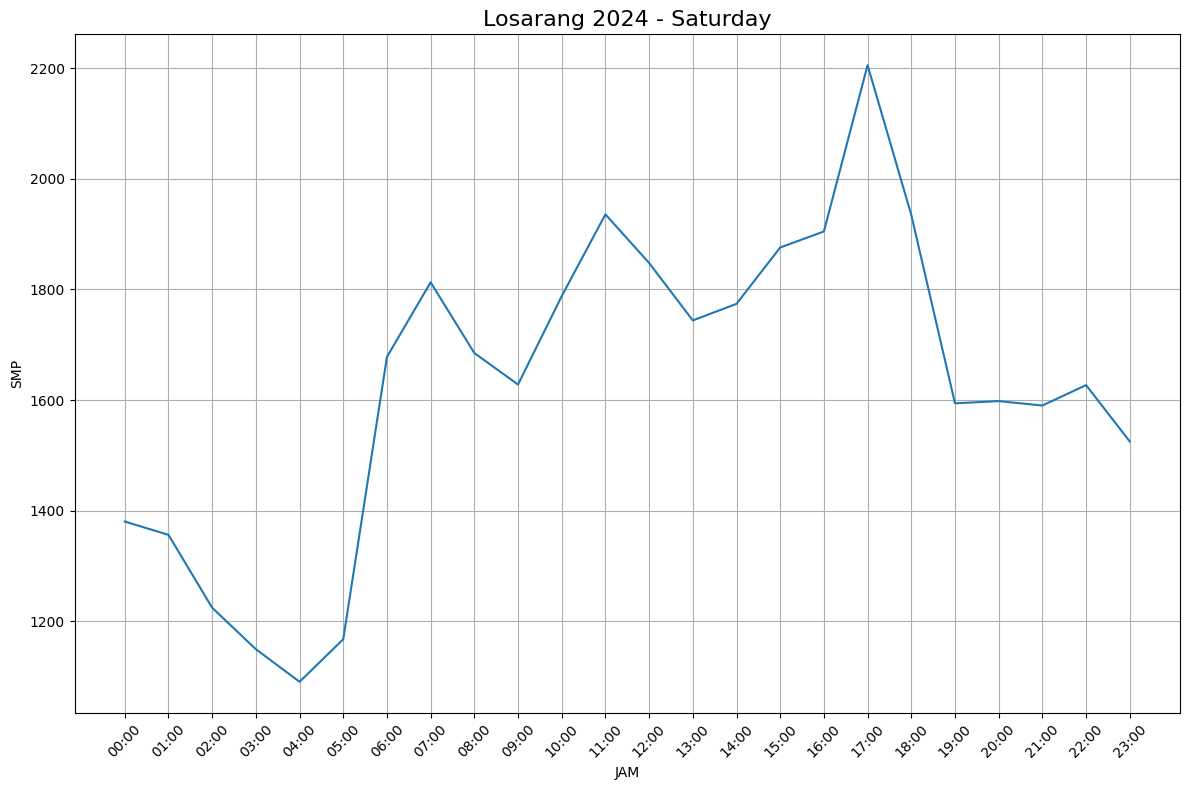

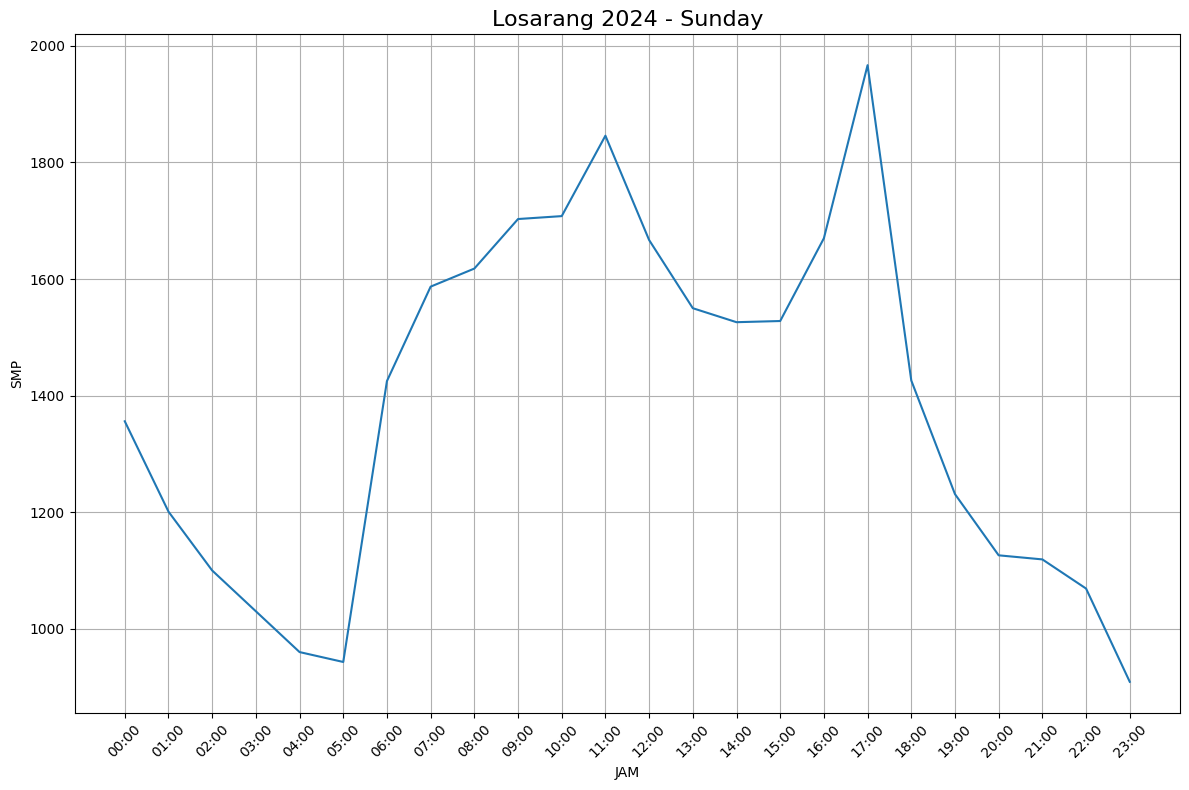

In [8]:
# Urutkan hari secara berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)

# Iterasi melalui hari dan plot setiap hari
for i, hari in enumerate(urutan_hari):
    fig = plt.subplots(figsize=(12, 8))
    data_harian = df[df['HARI'] == hari]  # Filter data per hari
    sns.lineplot(x=data_harian['JAM'], y=data_harian['SMP'])
    plt.title('Losarang 2024 - ' + hari, fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('../Data/Visualisasi/Losarang/2024/4_'+str(i+1)+'_'+hari+'_losarang_2024.png')
    plt.show()

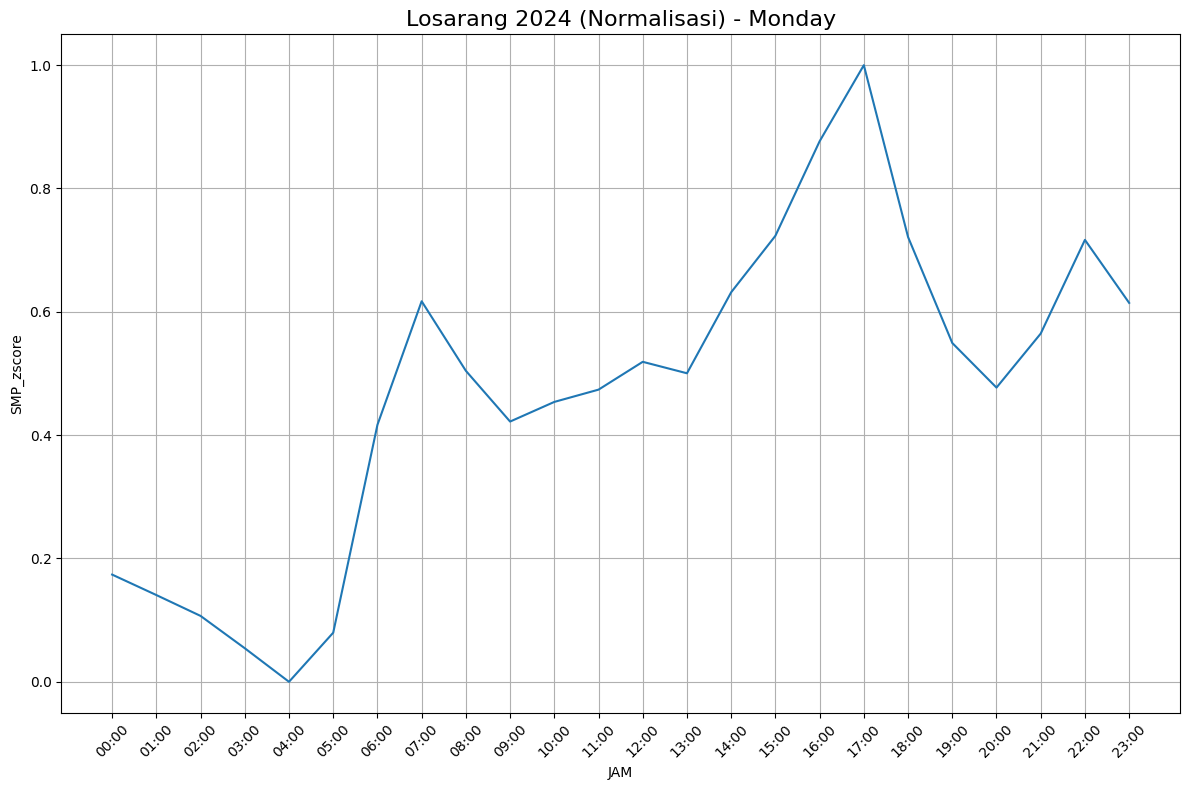

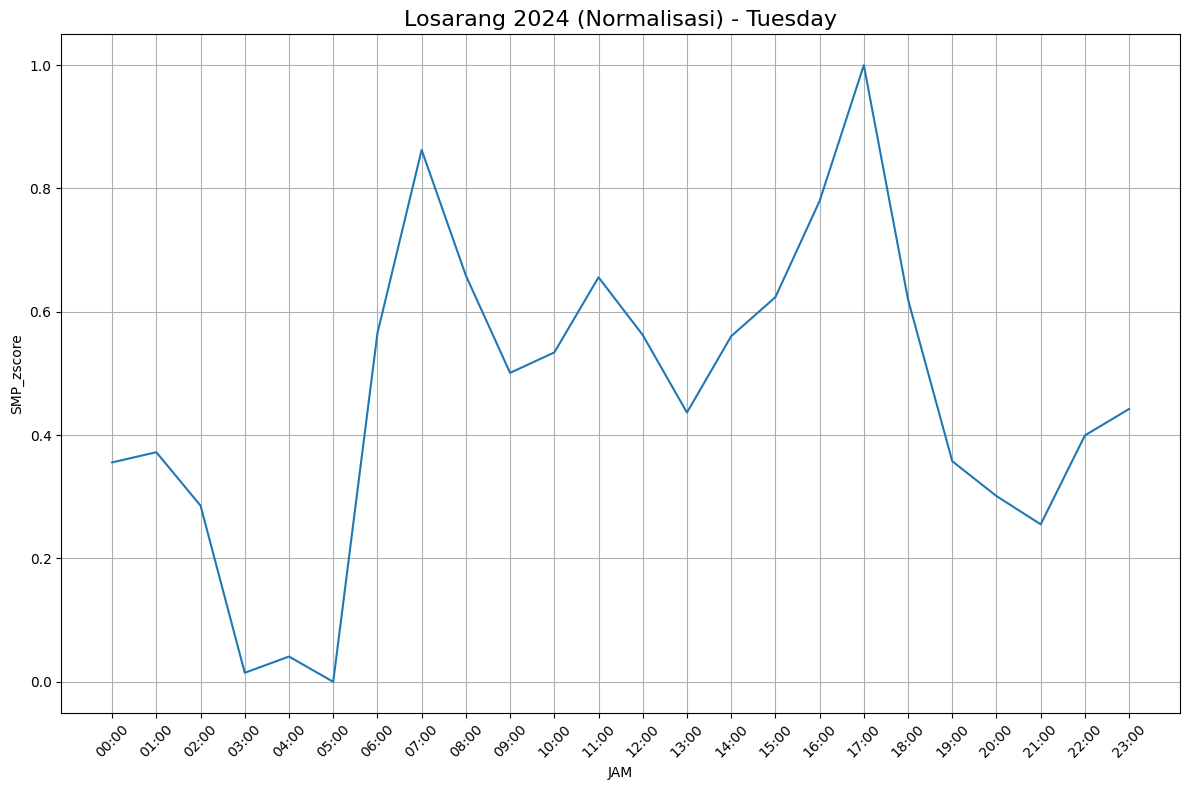

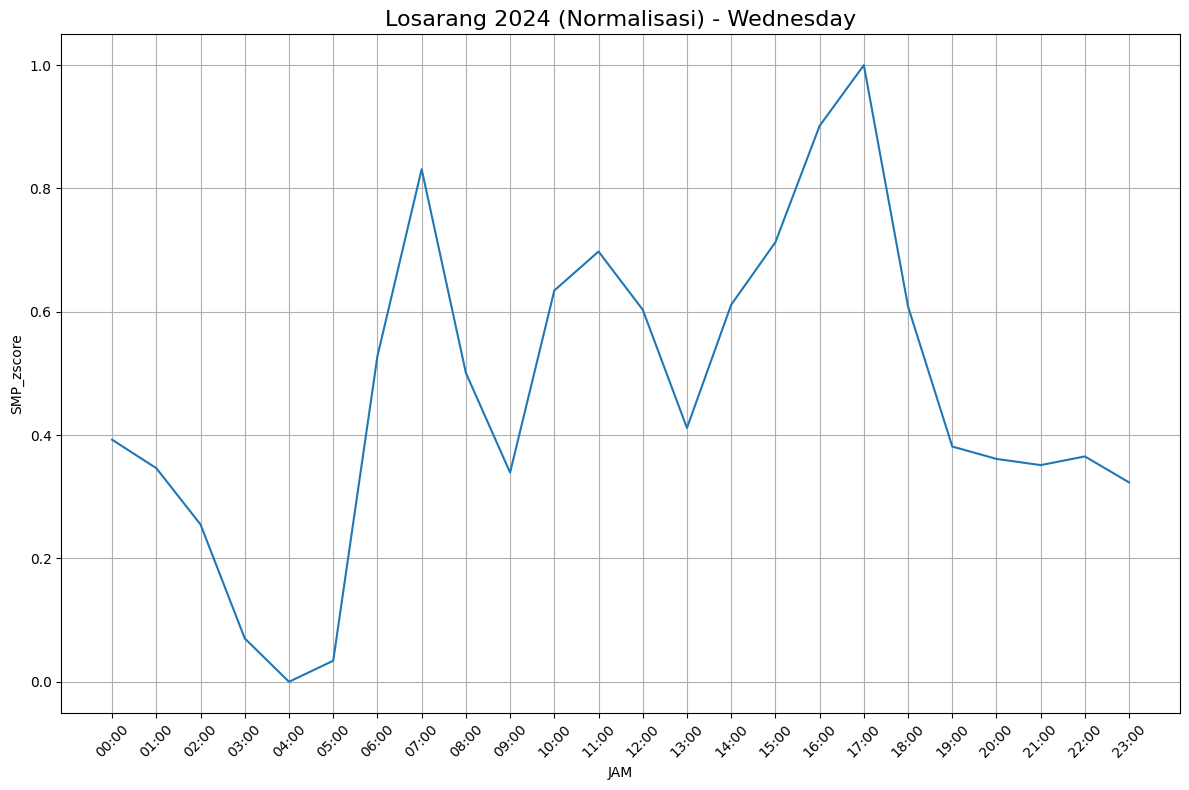

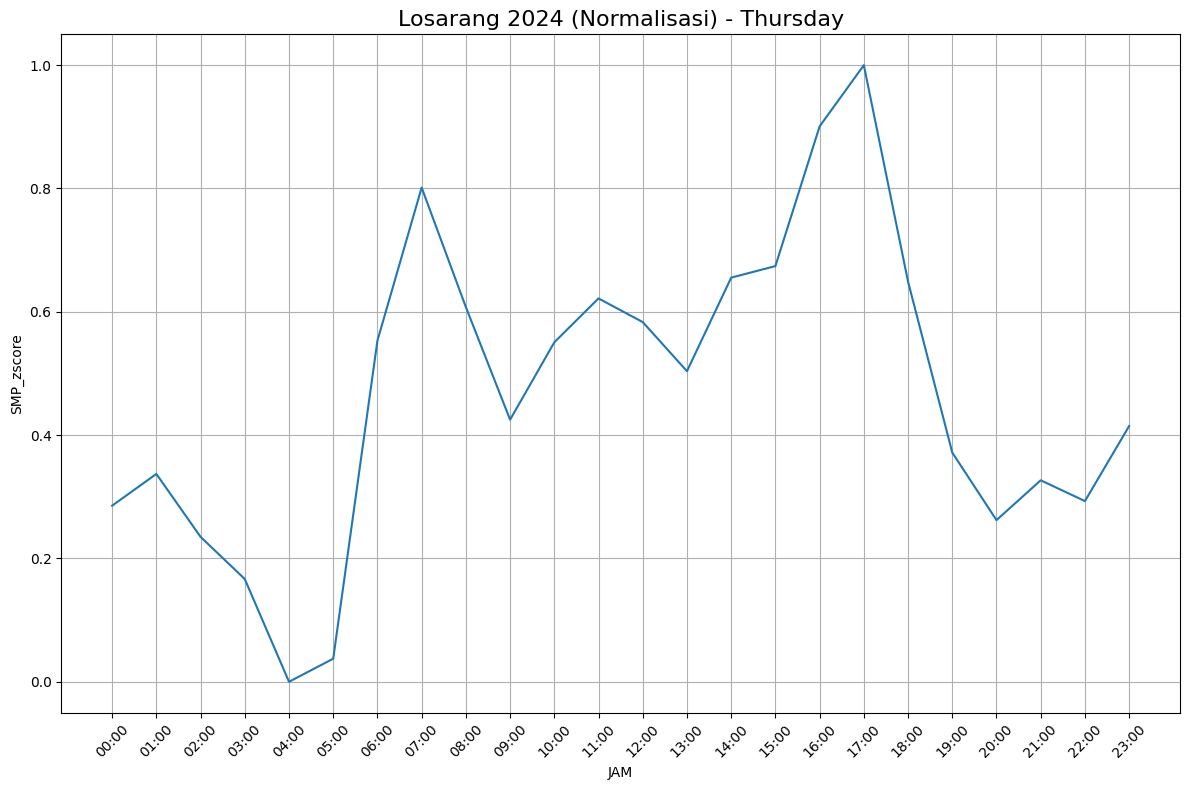

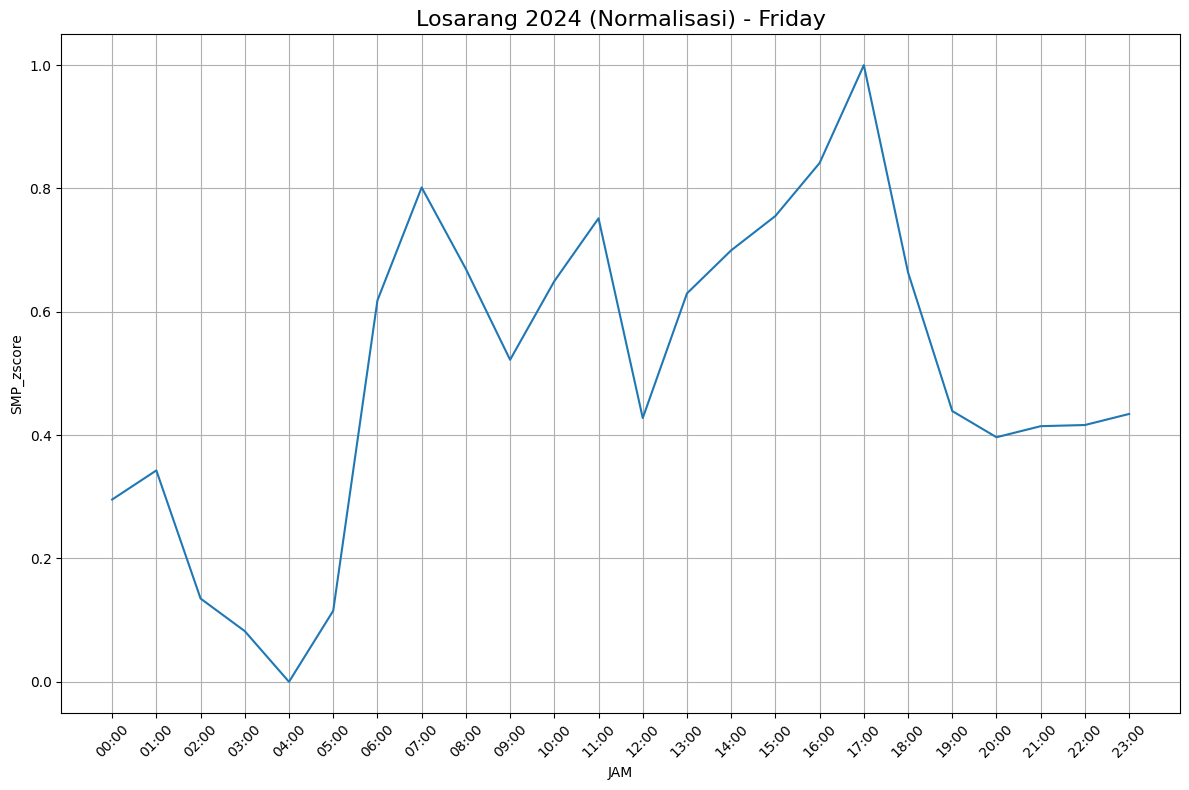

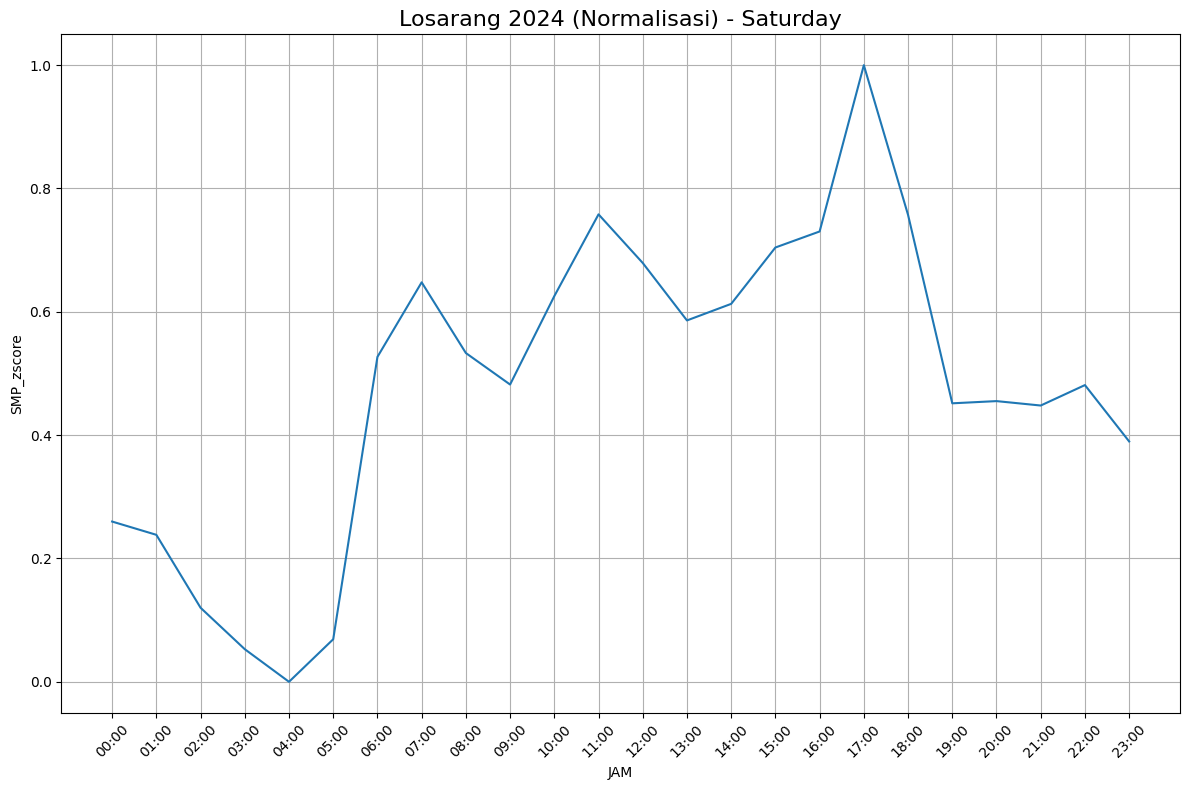

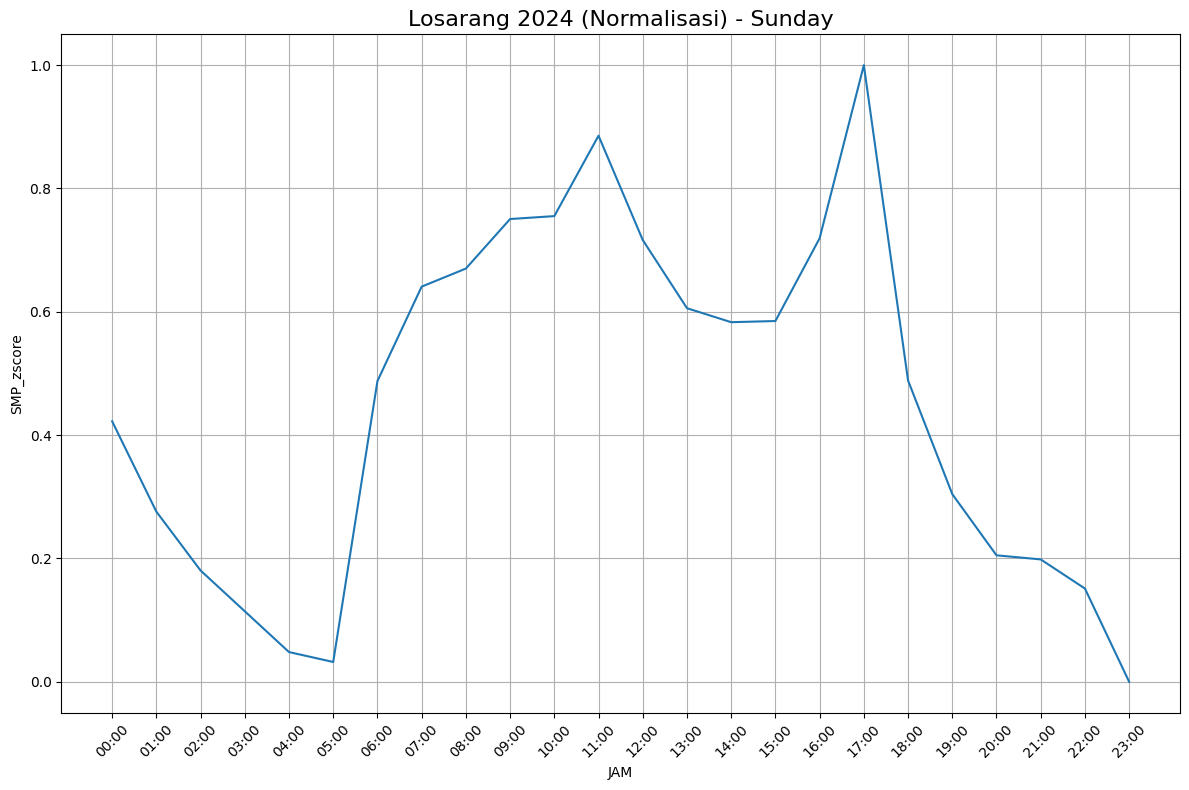

In [9]:
# Urutkan hari secara berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)

# Iterasi melalui hari dan plot setiap hari
for i, hari in enumerate(urutan_hari):
    fig = plt.subplots(figsize=(12, 8))
    data_harian = df[df['HARI'] == hari]  # Filter data per hari
    sns.lineplot(x=data_harian['JAM'], y=data_harian['SMP_zscore'])
    plt.title('Losarang 2024 (Normalisasi) - ' + hari, fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.savefig('../Data/Visualisasi/Losarang/2024/4_'+str(i+1)+'_'+hari+'_normalisasi_losarang_2024.png')
    plt.show()

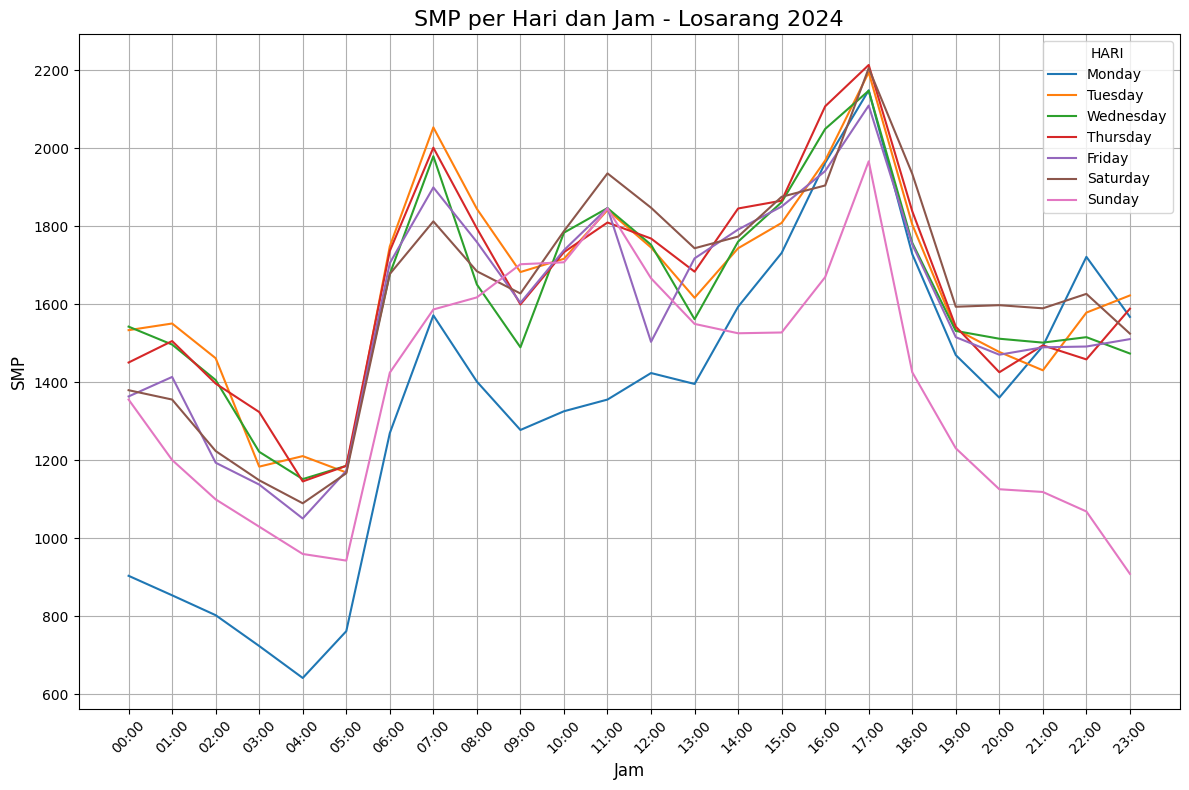

In [10]:
# Ubah 'JAM' menjadi tipe waktu dan 'HARI' menjadi kategori berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)
# df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M').dt.time

# Membuat visualisasi menggunakan Seaborn lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['JAM'].astype(str), y=df['SMP'], hue=df['HARI'])

# Menambahkan label dan judul
plt.title('SMP per Hari dan Jam - Losarang 2024', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('SMP', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Losarang/2024/4_harian_losarang_2024.png')
plt.show()

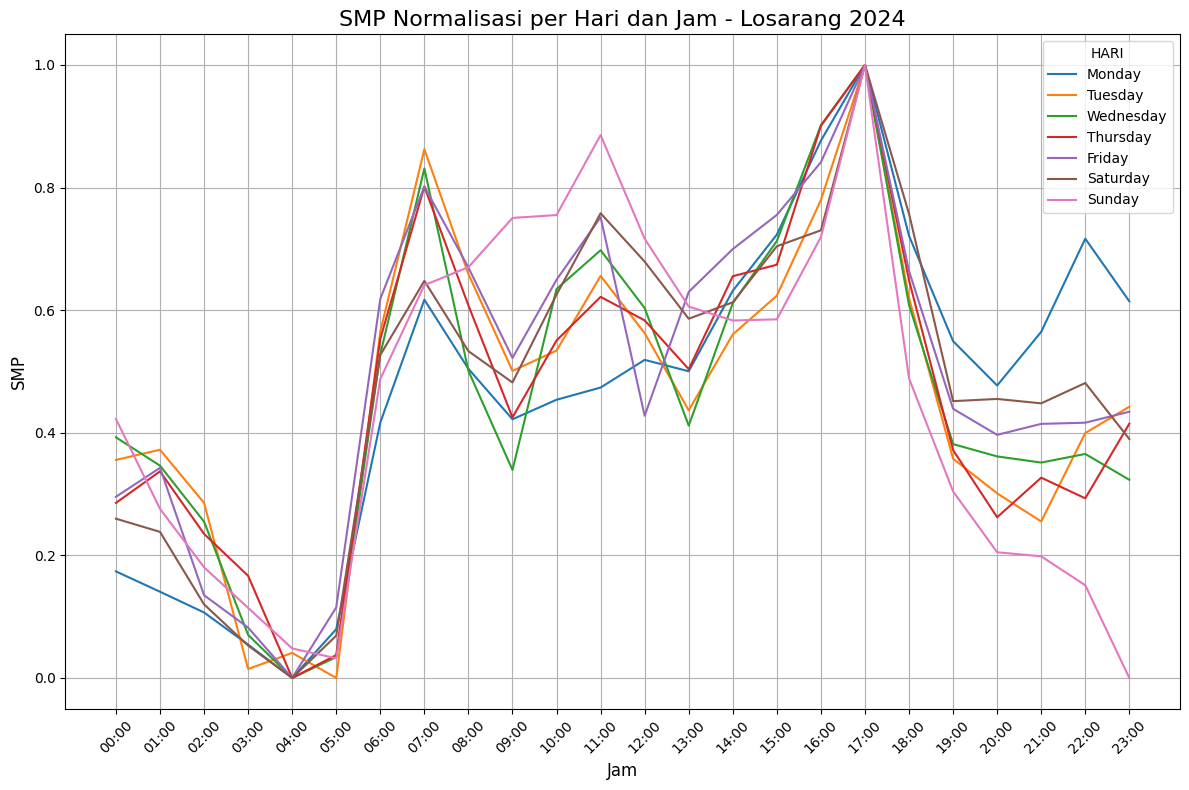

In [11]:
# Ubah 'JAM' menjadi tipe waktu dan 'HARI' menjadi kategori berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)
# df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M').dt.time

# Membuat visualisasi menggunakan Seaborn lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['JAM'].astype(str), y=df['SMP_zscore'], hue=df['HARI'])

# Menambahkan label dan judul
plt.title('SMP Normalisasi per Hari dan Jam - Losarang 2024', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('SMP', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Losarang/2024/4_harian_normalisasi_losarang_2024.png')
plt.show()